<a href="https://colab.research.google.com/github/jayeshsaini/Data-Lit/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

## 1. Select a dataset
The [Pokeman](https://www.kaggle.com/abcsds/pokemon) dataset seems most interesting to me among the most voted datasets on Kaggle.

In [21]:
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [22]:
!kaggle datasets list -h

usage: kaggle datasets list [-h] [--sort-by SORT_BY] [--size SIZE]
                            [--file-type FILE_TYPE] [--license LICENSE_NAME]
                            [--tags TAG_IDS] [-s SEARCH] [-m] [--user USER]
                            [-p PAGE] [-v]

optional arguments:
  -h, --help            show this help message and exit
  --sort-by SORT_BY     Sort list results. Default is 'hottest'. Valid options are 'hottest', 'votes', 'updated', and 'active'
  --size SIZE           Search for datasets of a specific size. Default is 'all'. Valid options are 'all', 'small', 'medium', and 'large'
  --file-type FILE_TYPE
                        Search for datasets with a specific file type. Default is 'all'. Valid options are 'all', 'csv', 'sqlite', 'json', and 'bigQuery'. Please note that bigQuery datasets cannot be downloaded
  --license LICENSE_NAME
                        Search for datasets with a specific license. Default is 'all'. Valid options are 'all', 'cc', 'gpl', 'odb', and

In [23]:
!kaggle datasets list --file-type csv --sort-by votes

ref                                           title                                                size  lastUpdated          downloadCount  
--------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
mlg-ulb/creditcardfraud                       Credit Card Fraud Detection                          66MB  2018-03-23 01:17:27         104799  
tmdb/tmdb-movie-metadata                      TMDB 5000 Movie Dataset                               9MB  2017-09-28 01:09:12          83115  
zynicide/wine-reviews                         Wine Reviews                                         51MB  2017-11-27 17:08:04          50914  
lava18/google-play-store-apps                 Google Play Store Apps                                2MB  2019-02-03 13:55:47          44334  
START-UMD/gtd                                 Global Terrorism Database                            28MB  2018-09-10 18:22:18          40980  
mcziel

In [24]:
!kaggle datasets download abcsds/pokemon

pokemon.zip: Skipping, found more recently modified local copy (use --force to force download)


In [25]:
!unzip pokemon.zip
!ls

Archive:  pokemon.zip
replace Pokemon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Pokemon.csv  sample_data	    test.zip   train.csv.zip
pokemon.zip  sample_submission.csv  train.csv


In [26]:
import pandas as pd
pokemon = pd.read_csv('Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [27]:
pokemon.describe(include='all')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Zekrom,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,362.813750,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,208.343798,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.000000,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,184.750000,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,364.500000,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,539.250000,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


## 2. Pose a question
What characteristics are associated with being Legendary?

## 3. Answer the question

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (9,6)

#### Pokemon Type
According to the plots below, these three types of Pokemon are most likely to be Legendary:   
 - Flying
 - Dragon
 - Psychic

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0, 0.5, 'Count')

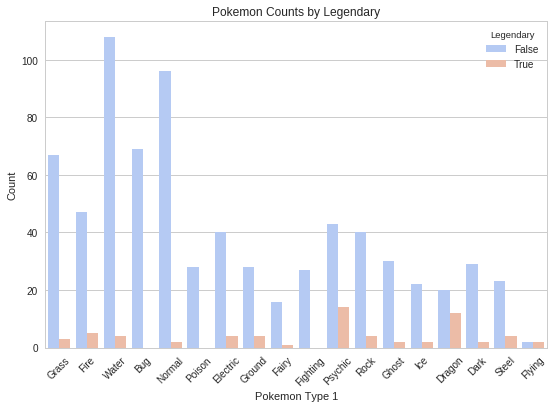

In [29]:
sns.countplot(pokemon['Type 1'],hue=pokemon['Legendary'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Pokemon Counts by Legendary')
plt.xlabel('Pokemon Type 1')
plt.ylabel('Count')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


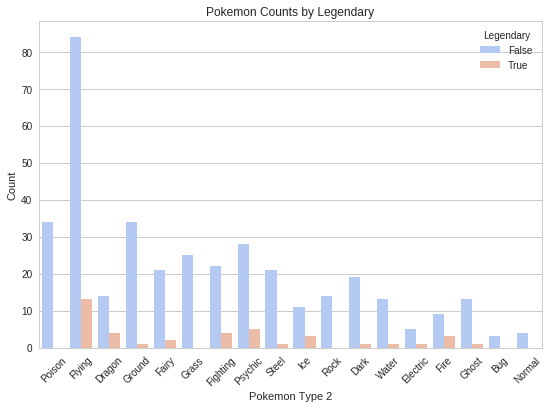

In [30]:
sns.countplot(pokemon['Type 2'],hue=pokemon['Legendary'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Pokemon Counts by Legendary')
plt.xlabel('Pokemon Type 2')
plt.ylabel('Count')
plt.legend(loc=1, title='Legendary')

### Pokemon Generation
Being Generation 3 has the highest probability (11.25%) to be Legendary.

In [31]:
pd.crosstab(pokemon.Generation, pokemon.Legendary, margins=True)

Legendary,False,True,All
Generation,,,
1,160,6,166
2,101,5,106
3,142,18,160
4,108,13,121
5,150,15,165
6,74,8,82
All,735,65,800


In [32]:
pokemon.groupby('Generation')['Legendary'].mean()

Generation
1    0.036145
2    0.047170
3    0.112500
4    0.107438
5    0.090909
6    0.097561
Name: Legendary, dtype: float64

### Pokemon Total Strength
Overall, Legendary Pokemons have higher Total Strength.

Text(0, 0.5, 'Pokemon Counts')

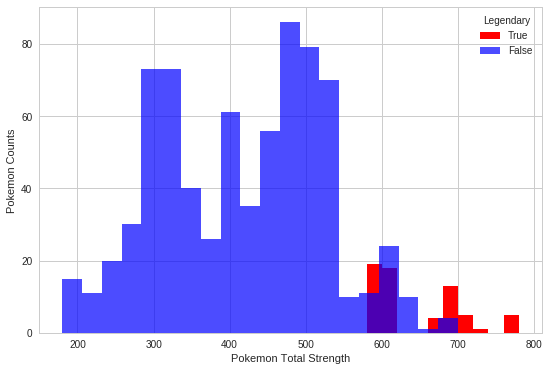

In [33]:
plt.hist(pokemon[pokemon.Legendary==True]['Total'], color='r', label='True')
plt.hist(pokemon[pokemon.Legendary==False]['Total'], color='b', label='False', alpha=0.7, bins=20)
plt.legend(title='Legendary', loc=1)
plt.xlabel('Pokemon Total Strength')
plt.ylabel('Pokemon Counts')

### Pokemon Separate Strength Points
The separate strength points all seem to contribute to being Legendary to some extent, but it's hard to tell which one(s) are the most important one(s).

In [34]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [35]:
pokemon_power = pokemon[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
sum(pokemon_power.drop('Total', axis=1).sum(axis=1) == pokemon_power.Total) # sanity check

800

In [46]:
pokemon_power = pokemon_power.drop('Total', axis=1)
pokemon_power['Legendary'] = pokemon.Legendary
pokemon_power.head()


ValueError: ignored

In [0]:
pokemon_temp = pokemon_power.drop('Legendary', axis=1)

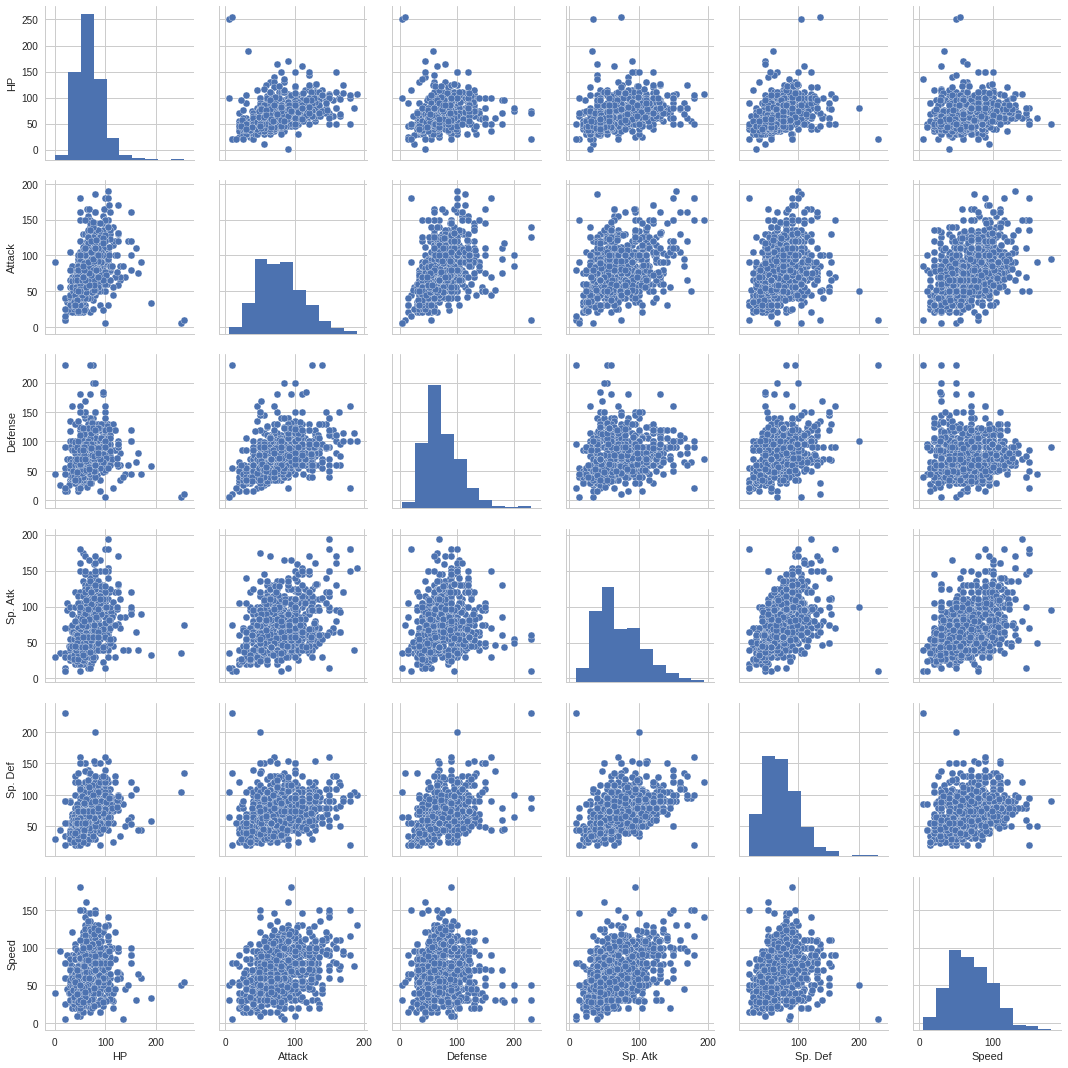

In [63]:
sns.pairplot(pokemon_temp,palette='coolwarm')

#### Dimensionality Reduction 
Apply PCA to reduce dimension to 2 dimensions.
The first principal component being greater than 2 indicates higher probability of being Legendary.

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
x = pokemon[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
x = StandardScaler().fit_transform(x)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
pca.explained_variance_ratio_
pcDF = pd.DataFrame(data=pc, columns=['pc1', 'pc2'])

In [0]:
pcDF['Legendary'] = pokemon['Legendary']

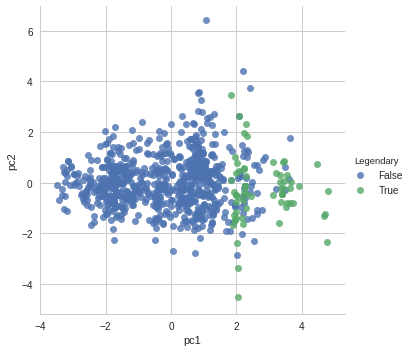

In [45]:
sns.lmplot(x='pc1', y='pc2', hue='Legendary', data=pcDF, fit_reg=False)

### Wrap up
Pokemon Type, Generation, and Strength are associated with being Legendary.